# Predicting Stock Prices using Logistic Regression.

#### Here, we are using BSE-GREENX stock data to predict whether for a given day's opening price and previous day's information of the stock, can be used to predict whether the closing price for the stock is more or less than its opening price.

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import svm
from sklearn import tree
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix
%matplotlib inline

#### Loading data of stock BSE-GREENX using pandas
##### DATA format is DATE, OPEN, HIGH, LOW, CLOSE

In [396]:
db = pd.read_csv("BSE-SENSEX.csv")
# db

#### Total 5 columns in data, with 2098 days(i.e. rows)

In [372]:
print db.shape
print db.size

(8702, 5)
43510


#### Now, Filling NaN values with one of the four different methods:

##### Method 1: Replace NaN values with 0.

In [324]:
# test = db[db_Open.isnull()]["Open"]
# test = test.fillna(0)
db = db.fillna(0)

##### Method 2: Replace NaN values in each column with the mean of that column.

In [348]:
db["Open"] = db["Open"].fillna(db["Open"].mean())
db["Close"] = db["Close"].fillna(db["Close"].mean())
db["High"] = db["High"].fillna(db["High"].mean())
db["Low"] = db["Low"].fillna(db["Low"].mean())

##### Method 3: Replace NaN values in each column with the median of that column.

In [373]:
db["Open"] = db["Open"].fillna(db["Open"].median())
db["Close"] = db["Close"].fillna(db["Close"].median())
db["High"] = db["High"].fillna(db["High"].median())
db["Low"] = db["Low"].fillna(db["Low"].median())

##### Method 4: Replace NaN values in each column with the mode of that column.

In [397]:
db["Open"] = db["Open"].fillna(db["Open"].mode().mean())
db["Close"] = db["Close"].fillna(db["Close"].mode().mean())
db["High"] = db["High"].fillna(db["High"].mode().mean())
db["Low"] = db["Low"].fillna(db["Low"].mode().mean())

### Pre-processing step.

#### EXTRACTing features & output labels  from given data. 

In [398]:
db["Change"] = db["Close"] - db["Open"]

In [399]:
db["Open1"] = db["Open"].shift(-1)
db["Close1"] = db["Close"].shift(-1)
db["High1"] = db["High"].shift(-1)
db["Low1"] = db["Low"].shift(-1)

In [400]:
db["Change1"] = db["Close1"] - db["Open1"]

#### Separating Features and label

In [401]:
features = ["Open", "Close1", "High1", "Low1", "Change1"]
label = "label"

#### Creating label from "Change" column:

if Change > 0 then label is 1
else if Change <= 0 label is -1

In [402]:
db["label"] = db["Change"].apply(lambda x : 1 if x > 0 else -1)

#### Featues after extraction

In [403]:
features

['Open', 'Close1', 'High1', 'Low1', 'Change1']

In [404]:
db[features][:-1].tail()

,Open,Close1,High1,Low1,Change1
8696,6726.119697,124.30,5791.8465,5592.074,-6601.819697
8697,6726.119697,124.18,5791.8465,5592.074,-6601.939697
8698,6726.119697,123.52,5791.8465,5592.074,-6602.599697
8699,6726.119697,122.85,5791.8465,5592.074,-6603.269697
8700,6726.119697,124.15,5791.8465,5592.074,-6601.969697


##### X is input and  Y is output

In [405]:
X = db[features][:-1]
y = db[label][:-1]

In [406]:
# db

#### Splitting data into training and test data

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression model

#### Creating logistic regression model

In [408]:
# model_1 = linear_model.LogisticRegression()
# model_1 = naive_bayes.GaussianNB()
# model_1 = svm.SVC()
model_1 = tree.DecisionTreeClassifier()

#### Fitting logisitic regression model on training data

In [409]:
model_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

#### Calculating Training Error

In [410]:
y_predict = model_1.predict(X_train)

In [411]:
error = y_predict - y_train

In [412]:
print np.sqrt(np.mean(np.square(error)))

0.0


#### Calculating Testing Error

In [413]:
y_cap = model_1.predict(X_test)

In [414]:
error = y_cap - y_test
print np.sqrt(np.mean(np.square(error)))

1.19254818183


#### Calculating training set accuracy

In [415]:
met.accuracy_score(y_train, y_predict)

1.0

In [416]:
model_1.score(X_train, y_train)

1.0

#### Calculating testing set accuracy

In [417]:
y_predict_test = model_1.predict(X_test)
met.accuracy_score(y_test, y_predict_test)

0.64445720850086152

In [418]:
model_1.score(X_test, y_test)

0.64445720850086152

In [419]:
confusion_matrix(y_test, y_cap)

array([[828, 328],
       [291, 294]])

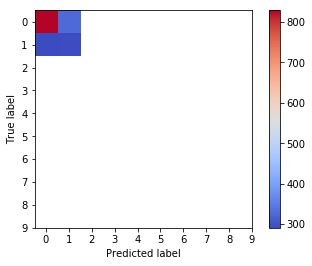

In [420]:
plt.imshow(confusion_matrix(y_test, y_cap), cmap="coolwarm", interpolation="None")
plt.colorbar()
plt.xlabel("Predicted label")
plt.xticks(range(10))
plt.yticks(range(10))
plt.ylabel("True label")

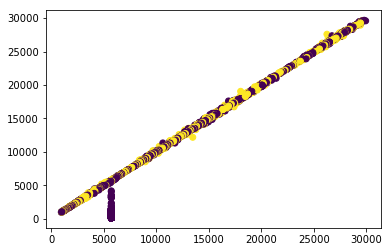

In [196]:
plt.scatter(X[features[:1]], X[features[1:2]], c=y)

In [197]:
print model_1.coef_
print model_1.intercept_

AttributeError: 'GaussianNB' object has no attribute 'coef_'

In [ ]:
plt.scatter(X[features[0]], X[features[1]], c=y)
line = np.linspace(-15, 15)
for coef in model_1.coef_[0]:
    plt.plot(line, -(line * coef + model_1.intercept_[0]))
plt.ylim(-10, 15)
plt.xlim(-10, 8)

# Results:

#### filling NAN values with db["Column_Name"].mode().mean() has given the best test accuracy so far.